In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

In [2]:
density_values, intgral_list, system_matrix_size = get_density_list()
system_matrix_size_home = system_matrix_size[0:4]
home_pc_median, home_pc_min, home_pc_max, home_pc_std = load_cpu_stats_from_files_pînned("other/pinned_home_pc", system_matrix_size_home)
server_median, server_min, server_max, server_std = load_cpu_stats_from_files_pînned("other/pinned_server", system_matrix_size)


In [3]:
system_matrix_size_home_GiB = system_matrix_size_home.astype(np.int64) / 1e9  * 16
system_matrix_size_GiB = system_matrix_size.astype(np.int64) / 1e9  * 16
print(system_matrix_size_home_GiB)
print(system_matrix_size_GiB)

[ 3.05853242  7.46634246 10.9311207  15.48133178]
[ 3.05853242  7.46634246 10.9311207  15.48133178 19.21883142 23.59541766]


C:\Users\Ian\AppData\Local\Temp\ipykernel_35160\543428300.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


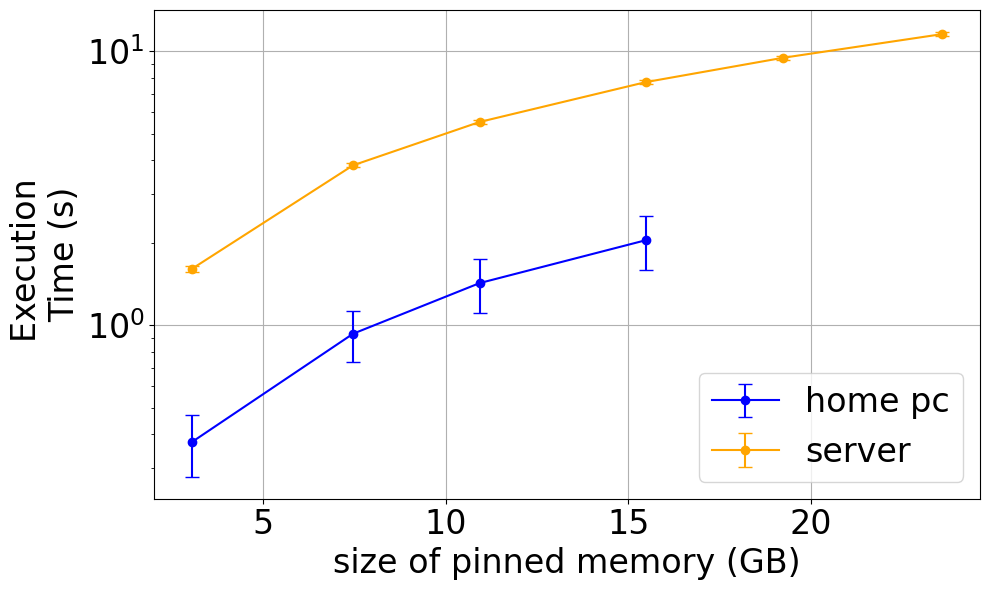

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CPU with error bars
ax.errorbar(
    system_matrix_size_home_GiB, home_pc_median, yerr=home_pc_std,
    marker='o', label='home pc', color='blue', capsize=5, linestyle='-'
)

# Plot GPU with error bars
ax.errorbar(
    system_matrix_size_GiB, server_median, yerr=server_std,
    marker='o', label='server', color='orange', capsize=5, linestyle='-'
)

ax.set_xlabel('size of pinned memory (GB)', fontsize=24)
ax.set_ylabel('Execution \nTime (s)', fontsize=24)
# ax.set_title('Execution Time vs threads', fontsize=24)

ax.tick_params(axis='both', labelsize=24)
ax.set_yscale('log')

fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(24)

ax.legend(fontsize=24)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/time_to_allocate_pinned_mem.svg", format='svg')
plt.show()